# Phase 2 Project

## Starting with the biggest data set of the project, the iMdb

## imdb Entity Relationship Diagram (ERD):

![title_airplane](./Images/db_chart.jpg)

## Initial importing etc...

In [4]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# will be looking at a lot of tables, so make a report
def df_report(df):
    print(df.info())
    print('===========================================================\n')
    print(df.describe())
    print('===========================================================\n')
    print(df.head())
    

In [6]:
# Set up the sql connection to im.db
conn = sql.connect("Data\\im.db")

In [7]:
# Have a look at the tables in the imdb
tables_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
tables_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


---

## Seems logical to start with movie_basics looking at the db org chart above

In [8]:
movie_basics_df = pd.read_sql(f"""
    SELECT *
    FROM
        movie_basics
    """, conn)

In [9]:
df_report(movie_basics_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None

          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000

    movie_id                    primary_title              original_title  \
0  tt0063540              

#### Theres a start date 2115, lets have a look at future start dates

In [10]:
# some with start dates that haven't occurred yet, lets have a look:
df_report(movie_basics_df.query('start_year > 2024'))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2949 to 96592
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         4 non-null      object 
 1   primary_title    4 non-null      object 
 2   original_title   4 non-null      object 
 3   start_year       4 non-null      int64  
 4   runtime_minutes  0 non-null      float64
 5   genres           4 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 224.0+ bytes
None

       start_year  runtime_minutes
count     4.00000              0.0
mean   2048.25000              NaN
std      44.50749              NaN
min    2025.00000              NaN
25%    2025.75000              NaN
50%    2026.50000              NaN
75%    2049.00000              NaN
max    2115.00000              NaN

         movie_id            primary_title           original_title  \
2949   tt10300398  Untitled Star Wars Film  Untitled Star Wars Fi

#### There are only 4 with future start dates, remove them

In [11]:
# they were all movies yet to occur, lets get rid of them
movie_basics_df = movie_basics_df.query('start_year < 2025')
df_report(movie_basics_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146140 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146140 non-null  object 
 1   primary_title    146140 non-null  object 
 2   original_title   146119 non-null  object 
 3   start_year       146140 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140732 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB
None

          start_year  runtime_minutes
count  146140.000000    114405.000000
mean     2014.620877        86.187247
std         2.720489       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2024.000000     51420.000000

    movie_id                    primary_title              original_title  \
0  tt0063540              

#### Investigating runtime_minutes outliers:

<AxesSubplot:>

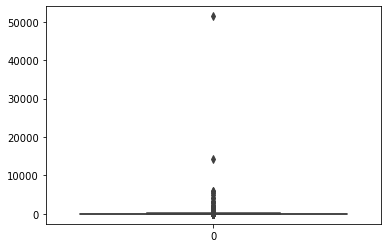

In [12]:
sns.boxplot(movie_basics_df.runtime_minutes)

#### Without extreme outliers:

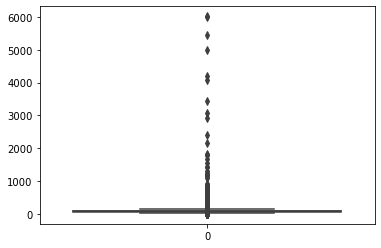

In [13]:
sns.boxplot(movie_basics_df.query('runtime_minutes < 10000').runtime_minutes);

#### Lets assume stakerholders are not interested in very long (>4hr) movies

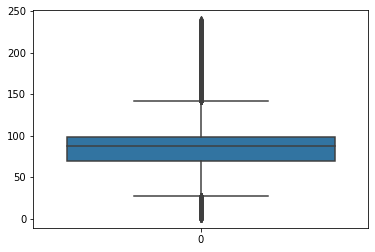

In [14]:
sns.boxplot(movie_basics_df.query('runtime_minutes < 240').runtime_minutes);

#### This doesn't look to far from normal distribution now, lets go ahead and remove movies over 4hr

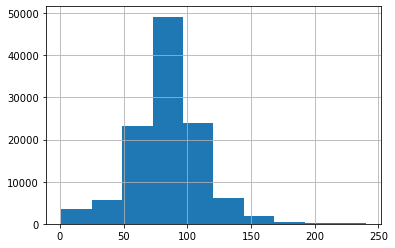

In [15]:
movie_basics_df = movie_basics_df.query('runtime_minutes <= 240')
movie_basics_df.runtime_minutes.hist();

#### Lets see if the very short movies distribution make sense:

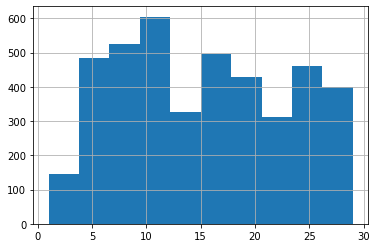

In [16]:
movie_basics_df.query('runtime_minutes < 30').runtime_minutes.hist();

#### No extreme outliers within the <30min group, lets leave it be

#### Lets look at null values

In [17]:
df_report(movie_basics_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114198 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         114198 non-null  object 
 1   primary_title    114198 non-null  object 
 2   original_title   114194 non-null  object 
 3   start_year       114198 non-null  int64  
 4   runtime_minutes  114198 non-null  float64
 5   genres           112033 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB
None

          start_year  runtime_minutes
count  114198.000000    114198.000000
mean     2014.397109        84.620133
std         2.637350        27.782978
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2014.000000        87.000000
75%      2017.000000        99.000000
max      2022.000000       240.000000

    movie_id                    primary_title              original_title  \
0  tt0063540              

#### Replace the nulls in string columns with 'data missing': 'genres' is catagorical so we can keep the data for these rows, 'original_title' only has 4 records, we will probably not care about this column anyway

In [18]:
movie_basics_df.fillna('data missing', inplace=True)
df_report(movie_basics_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114198 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         114198 non-null  object 
 1   primary_title    114198 non-null  object 
 2   original_title   114198 non-null  object 
 3   start_year       114198 non-null  int64  
 4   runtime_minutes  114198 non-null  float64
 5   genres           114198 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB
None

          start_year  runtime_minutes
count  114198.000000    114198.000000
mean     2014.397109        84.620133
std         2.637350        27.782978
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2014.000000        87.000000
75%      2017.000000        99.000000
max      2022.000000       240.000000

    movie_id                    primary_title              original_title  \
0  tt0063540              

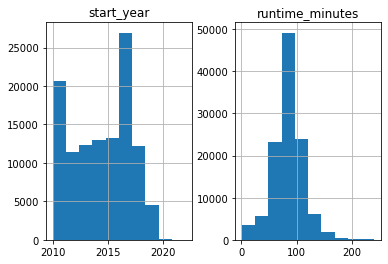

In [19]:
movie_basics_df.hist();

#### All missingness taken care of, outliers removed

#### We want to unpack the 'genres' column into distict columns for better genre slicing and analysis
#### ***NOTE: This maybe should come later in feature engineering (or not at all), putting it in for now***

In [20]:
# We will use 0 or 1 instead of True and False for easier analysis later on

def split_genres(genres):
    """
    takes a string input comma delimeted
    returns a list of words
    """
    genre_list = []
    if genres != None:     
        for genre in genres.split(','):
            genre_list.append(genre)
    return genre_list

def assign_genre(row):
    """
    takes a row from df and 
    assigns True to any field that is in the row.genres
    returns the modified row
    """
    genres = split_genres(row['genres'])
    for genre in genres:
        row[genre] = 1
    return row

# Loop through the genres column and collect all distinct genres keywords
genres_set = set([])
for genres in movie_basics_df.genres:
    for word in split_genres(genres):
        genres_set.add(word)

# Create a column in the df for each distinct genre, instantiate with 0
for genre in genres_set:
    movie_basics_df[genre] = 0
        
# Assign 1 to any of the new genre fields whos row 'genres' field contains that genre
movie_basics_df = movie_basics_df.apply(assign_genre, axis=1)


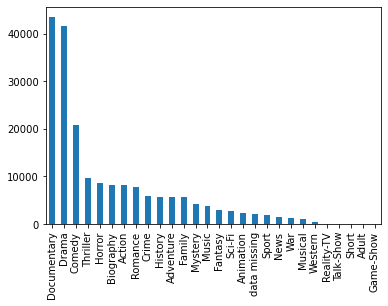

In [21]:
genre_sums = movie_basics_df[genres_set].sum().sort_values(ascending=False)
genre_sums.plot(kind='bar');

In [25]:

genre_sums['data missing'] / genre_sums.sum()


0.011067997893757444

---

## Lets take a look at 'connector' tables: known_for, directors, writers

In [311]:
known_for_df = pd.read_sql("""
                    SELECT *
                    FROM
                        known_for
                    """, conn)
known_for_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [312]:
directors_df = pd.read_sql("""
                    SELECT *
                    FROM
                        directors
                    """, conn)
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [313]:
writers_df = pd.read_sql("""
                    SELECT *
                    FROM
                        writers
                    """, conn)
writers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


#### No missingness in the 'connector' tables lets move on
___

## Take a look at persons table

In [314]:
persons_df = pd.read_sql("""
                    SELECT *
                    FROM
                        persons
                    """, conn)
df_report(persons_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None

         birth_year   death_year
count  82736.000000  6783.000000
mean    1967.043826  2000.523367
std       22.122190    43.951530
min        1.000000    17.000000
25%     1957.000000  2001.000000
50%     1971.000000  2013.000000
75%     1981.000000  2016.000000
max     2014.000000  2019.000000

   person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0

#### key fields here are person_id, primary_name and they are not missing data.  We will probably not use the other columns, lets move on
---

## Take a look at principals table

In [315]:
principals_df = pd.read_sql("""
                    SELECT *
                    FROM
                        principals
                    """, conn)
df_report(principals_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None

           ordering
count  1.028186e+06
mean   4.739847e+00
std    2.747446e+00
min    1.000000e+00
25%    2.000000e+00
50%    4.000000e+00
75%    7.000000e+00
max    1.000000e+01

    movie_id  ordering  person_id  category       job        characters
0  tt0111414         1  nm0246005     actor      None       ["The Man"]
1  tt0111414         2  nm0398271  director      None              None
2  tt0111414         3  nm3739909  producer  producer              None
3  tt0323808        10  nm

#### The only missingness here is in job and characters, and we might not even use this table lets move on
---

## Take a look at movie_akas table

In [316]:
movie_akas_df = pd.read_sql("""
                    SELECT *
                    FROM
                        movie_akas
                    """, conn)
df_report(movie_akas_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None

            ordering  is_original_title
count  331703.000000      331678.000000
mean        5.125872           0.134769
std         6.706664           0.341477
min         1.000000           0.000000
25%         1.000000           0.000000
50%         2.000000           0.000000
75%         6.000000           0.000000
max        

#### Whats going on with is_original_title?

In [317]:
movie_akas_df.is_original_title.value_counts()

0.0    286978
1.0     44700
Name: is_original_title, dtype: int64

#### Looks like boolean coded as 0, 1.  Only 25 missing, we probably wont use it.

#### Taking a look at region, might be important

In [318]:
movie_akas_df.region.value_counts().sort_values(ascending=False).head(15)

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
ES      9007
GB      8942
CA      8871
PL      8691
IN      8435
BR      8167
IT      7983
GR      6311
JP      6308
HU      6258
Name: region, dtype: int64

#### We should fill in missingness of all catagorical fields with 'data missing', some of this might be useful

In [319]:
fill_columns = ['region', 'language', 'types', 'attributes']
movie_akas_df[fill_columns] = movie_akas_df[fill_columns].fillna('data missing')
movie_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             331703 non-null  object 
 4   language           331703 non-null  object 
 5   types              331703 non-null  object 
 6   attributes         331703 non-null  object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


---

## Last table in the iMDB: movie_ratings table

In [320]:
movie_ratings_df = pd.read_sql("""
                    SELECT *
                    FROM
                        movie_ratings
                    """, conn)
df_report(movie_ratings_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None

       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


#### No missingness, lets look at the distributions

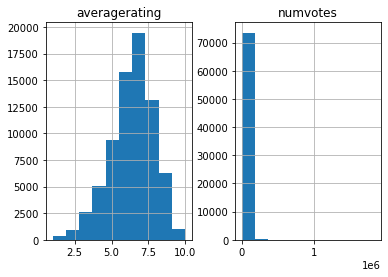

In [321]:
movie_ratings_df.hist();

#### averagerating looks ok, look deeper at numvotes

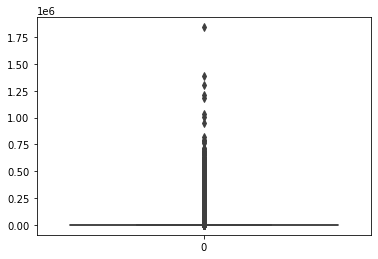

In [322]:
sns.boxplot(movie_ratings_df.numvotes);

In [323]:
movie_ratings_df.query('numvotes > 1000000')

,movie_id,averagerating,numvotes
3140,tt1130884,8.1,1005960
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
39356,tt0993846,8.2,1035358
48221,tt0848228,8.1,1183655
63498,tt1375666,8.8,1841066


#### No crazy outliers, it appears to be exponential distribution, lets look at log:

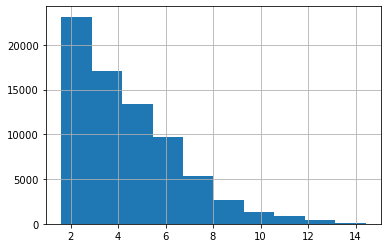

In [324]:
np.log(movie_ratings_df.numvotes).hist();

#### Probably won't matter but lets do it anyway for potential modeling(?). Add a column for log(numvotes)

In [325]:
movie_ratings_df['log_numvotes'] = np.log(movie_ratings_df.numvotes)

In [326]:
df_report(movie_ratings_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
 3   log_numvotes   73856 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ MB
None

       averagerating      numvotes  log_numvotes
count   73856.000000  7.385600e+04  73856.000000
mean        6.332729  3.523662e+03      4.374729
std         1.474978  3.029402e+04      2.201129
min         1.000000  5.000000e+00      1.609438
25%         5.500000  1.400000e+01      2.639057
50%         6.500000  4.900000e+01      3.891820
75%         7.400000  2.820000e+02      5.641907
max        10.000000  1.841066e+06     14.425855

     movie_id  averagerating  numvotes  log_numvotes
0  tt10356526            8.3        31      3.433987
1  tt1038460

#### Done cleaning, close the db connection

In [331]:
conn.close()

---

## Save the changes of iMdb cleaning both in a new db and create a csv for each table for potential use in Tableau (I couldn't get the sqlite ODBC drivers to install so will just use .csv for tableau)

In [330]:
# Save to new sql database
conn2 = sql.connect('Reduced\\cleaned_imdb.db')

persons_df.to_sql('persons', conn2, if_exists='replace', index=False)
principals_df.to_sql('principals', conn2, if_exists='replace', index=False)
known_for_df.to_sql('known_for', conn2, if_exists='replace', index=False)
directors_df.to_sql('directors', conn2, if_exists='replace', index=False)
writers_df.to_sql('writers', conn2, if_exists='replace', index=False)
movie_basics_df.to_sql('movie_basics', conn2, if_exists='replace', index=False)
movie_ratings_df.to_sql('movie_ratings', conn2, if_exists='replace', index=False)
movie_akas_df.to_sql('movie_akas', conn2, if_exists='replace', index=False)
conn2.close()

C:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [329]:
# Save to csv
persons_df.to_csv(f'Reduced\\persons.csv', index=False)
principals_df.to_csv(f'Reduced\\principals.csv', index=False)
known_for_df.to_csv(f'Reduced\\known_for.csv', index=False)
directors_df.to_csv(f'Reduced\\directors.csv', index=False)
writers_df.to_csv(f'Reduced\\writers.csv', index=False)
movie_basics_df.to_csv(f'Reduced\\movie_basics.csv', index=False)
movie_ratings_df.to_csv(f'Reduced\\movie_ratings.csv', index=False)
movie_akas_df.to_csv(f'Reduced\\movie_akas.csv', index=False)

---
---

In [341]:
conn = sql.connect('Reduced\\cleaned_imdb.db')

In [402]:
df = pd.read_sql("""
    SELECT 
        p.primary_name,
        pr.characters,
        bas.primary_title,
        bas.start_year
    FROM
        persons p
    JOIN
        principals pr
        ON p.person_id = pr.person_id
    JOIN
        movie_basics bas
        ON pr.movie_id = bas.movie_id
    WHERE
        p.primary_name LIKE 'Alec B%'
    GROUP BY
        bas.primary_title
    ORDER BY
        p.primary_name;
    """, conn)

In [403]:
df.head(50)

,primary_name,characters,primary_title,start_year
0,Alec Babos,"[""Himself""]",Last of the Independents,2012
1,Alec Balas,None,Alma's Secret,2017
2,Alec Balas,None,For The Love Of Food,2018
3,Alec Balas,None,Runner,2018
4,Alec Baldwin,"[""General Dixon""]",Aloha,2015
5,Alec Baldwin,"[""Mr. Edwards""]",AmeriQua,2013
6,Alec Baldwin,"[""Gino Fratelli""]",Back in the Day,2016
7,Alec Baldwin,"[""Peter""]",Before You Know It,2019
8,Alec Baldwin,"[""Bill Oakland""]",Blind,2017
9,Alec Baldwin,"[""Hal""]",Blue Jasmine,2013
